<a href="https://colab.research.google.com/github/miguel123grf/PML/blob/main/PML_Assigment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercicio 5


Epoch 1/200
5/5 [==============================] - 3s 113ms/step - loss: 2.2823 - accuracy: 0.2067 - val_loss: 1.5361 - val_accuracy: 0.5194
Epoch 2/200
5/5 [==============================] - 0s 34ms/step - loss: 1.8216 - accuracy: 0.3967 - val_loss: 0.9220 - val_accuracy: 0.7389
Epoch 3/200
5/5 [==============================] - 0s 30ms/step - loss: 1.5428 - accuracy: 0.4913 - val_loss: 0.9074 - val_accuracy: 0.8194
Epoch 4/200
5/5 [==============================] - 0s 28ms/step - loss: 1.4585 - accuracy: 0.5122 - val_loss: 0.8203 - val_accuracy: 0.8278
Epoch 5/200
5/5 [==============================] - 0s 34ms/step - loss: 1.4037 - accuracy: 0.5379 - val_loss: 0.7259 - val_accuracy: 0.8639
Epoch 6/200
5/5 [==============================] - 0s 20ms/step - loss: 1.3254 - accuracy: 0.5623 - val_loss: 0.7304 - val_accuracy: 0.8667
Epoch 7/200
5/5 [==============================] - 0s 21ms/step - loss: 1.3115 - accuracy: 0.5630 - val_loss: 0.7232 - val_accuracy: 0.8806
Epoch 8/200
5/5 [==

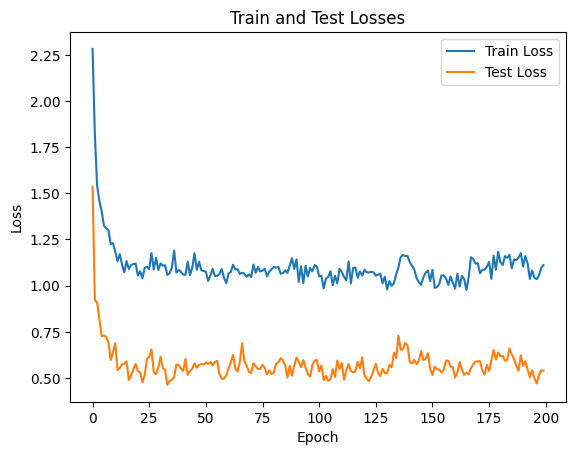

Accuracy on test set: 0.9083
12/12 [==============================] - 0s 2ms/step


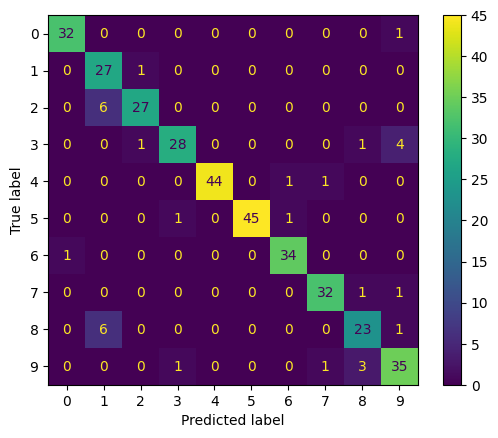

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import random

IRIS = False  # Set to True for Iris dataset, False for MNIST (Digits dataset)
SHOW = False  # Show image for MNIST dataset

# Load dataset
if IRIS:
    examples = load_iris()
else:
    examples = load_digits()
    if SHOW:
        idx = random.randint(0, len(examples.target))
        print(examples.data[idx])
        print(examples.data[idx].reshape(8, 8))
        print(examples.target[idx])
        plt.matshow(examples.data[idx].reshape(8, 8), cmap=plt.cm.gray_r)
        plt.show()

X = examples.data
y = examples.target

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.int64)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.int64)

# Parameters
input_size = X_train_tensor.shape[1]
hidden_size = 10
output_size = len(np.unique(y))
batch_size = 296
num_epochs = 200
learning_rate = 0.1
regularization_param = 0.001
dropout_p = 0.30

# Define the model using Keras Sequential API
model = models.Sequential([
    layers.Dense(hidden_size, activation='relu', input_shape=(input_size,),
                 kernel_regularizer=regularizers.l2(regularization_param)),
    layers.Dropout(dropout_p),
    layers.Dense(hidden_size, activation='relu',
                 kernel_regularizer=regularizers.l2(regularization_param)),
    layers.Dropout(dropout_p),
    layers.Dense(output_size)
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_tensor, y_train_tensor, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(X_test_tensor, y_test_tensor), verbose=1)

# Plotting train and test losses
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Losses')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_tensor, y_test_tensor, verbose=0)
print(f'Accuracy on test set: {test_accuracy:.4f}')

# Predictions and confusion matrix
y_pred = model.predict(X_test_tensor)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
labels = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()
